In [1]:
#libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('C:\\Users\\Riddhi\\Desktop\\heart.csv') #convert csv to data_frame
df.head() #print first 5 rows of dataframe

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
print(df.corr()["target"].abs().sort_values(ascending=False)) #columns are coorealted with target column

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


In [40]:
df2 = df.copy() #copy dataframe

#function for age classification
def age_function(age):
    if age <= 45:
        return 'younger'
    elif age > 45 and age <65:
        return 'middled'
    else:
        return 'elder'
    
df2['age'] = df2['age'].apply(age_function) #call the age function

In [41]:
sns.set_style('darkgrid')
sns.set_palette('Set2')

Text(0.5, 1.0, 'Age')

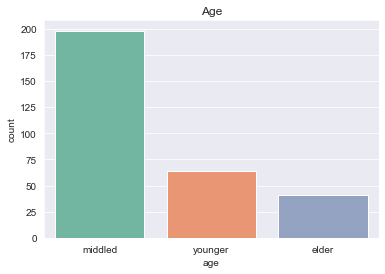

In [42]:
sns.countplot(data= df2, x='age') #make a count plot and  count of observations 
plt.title('Age')

In [43]:
def chng(chol):
    if chol < 200:
        return 'Normal cholesterol'
    elif chol > 200 and chol < 240:
        return 'Abnormal cholesterol'
    else:
        return 'Risky cholesterol'
    
df2['chol'] = df2['chol'].apply(chng)

Text(0.5, 1.0, 'Age v/s cholesterol\n')

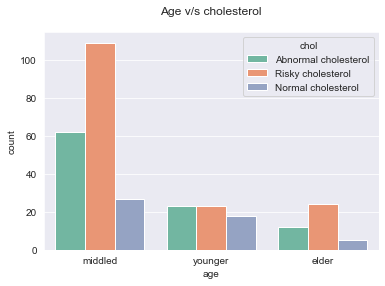

In [44]:
# df2['target'] = df2['target'].apply(chng2)
sns.countplot(data= df2, x='age',hue='chol')
plt.title('Age v/s cholesterol\n')

Text(0.5, 1.0, 'Age VS Gender')

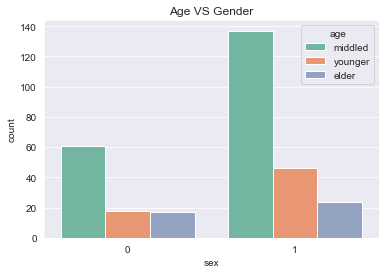

In [45]:
sns.countplot(data= df2, hue ='age' , x = 'sex') #make a count plot and  count of observations 
plt.title('Age VS Gender')

Text(0.5, 1.0, 'Age VS cardio')

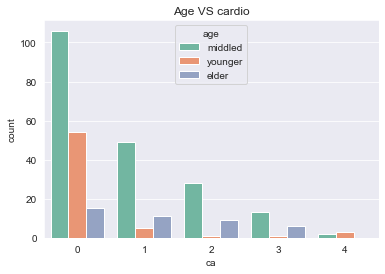

In [46]:
sns.countplot(data= df2, hue ='age' , x = 'ca') #make a count plot and  count of observations 
plt.title('Age VS cardio')

In [15]:
from sklearn.model_selection import train_test_split

#split the dataset into train and test
predictors = df.drop("target",axis=1)
target = df["target"]

#split train and test set
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)
print("Training features have {0} records and Testing features have {1} records.".\
      format(X_train.shape[0], X_test.shape[0]))

Training features have 242 records and Testing features have 61 records.


In [16]:
X_train.shape #print train value

(242, 13)

In [17]:
X_test.shape #print test value

(61, 13)

In [18]:
Y_train.shape #print train value

(242,)

In [19]:
Y_test.shape

(61,)

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
def train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):
    
    """
    Fit the chosen model and print out the score.
    
    """
    
    # instantiate model
    model = classifier(**kwargs)
    
    # train model
    model.fit(X_train,y_train)
    
    # check accuracy and print out the results
    fit_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")
    
    return model

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier, n_neighbors=8)
knn.fit(X_train, Y_train)
y_pred_knn = knn.predict(X_test) 
print(y_pred_knn)

Train accuracy: 71.90%
Test accuracy: 68.85%
[0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0
 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0]


In [51]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#calculate precision, recall and F1 score
KNN_precision_score = precision_score(Y_test,y_pred_knn)
KNN_recall_score = recall_score(Y_test,y_pred_knn)
KNN_Score = f1_score(Y_test,y_pred_knn)
print("precision score = ",KNN_precision_score)
print("recall score = ", KNN_recall_score)
print("f1 score = ", KNN_Score)

precision score =  0.7419354838709677
recall score =  0.6764705882352942
f1 score =  0.7076923076923077


In [23]:
score_knn = round(accuracy_score(y_pred_knn,Y_test)*100,2)
print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 68.85 %


In [24]:
from sklearn.metrics import confusion_matrix

In [26]:
matrix= confusion_matrix(Y_test, y_pred_knn)

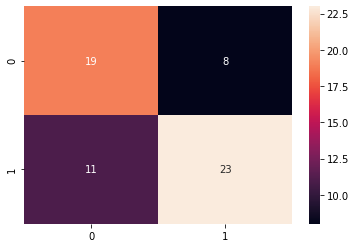

In [27]:
sns.heatmap(matrix,annot = True, fmt = "d")

In [52]:
from sklearn.metrics import classification_report

In [54]:
print(classification_report(Y_test,y_pred_knn))
acc = f1_score(Y_test,KNN_pred, average='macro')

              precision    recall  f1-score   support

           0       0.63      0.70      0.67        27
           1       0.74      0.68      0.71        34

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61

